In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [3]:
housing = pd.read_csv('train.csv', index_col=0)
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [57]:
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
plt.hist(housing['PoolQC'])

TypeError: '<=' not supported between instances of 'float' and 'str'

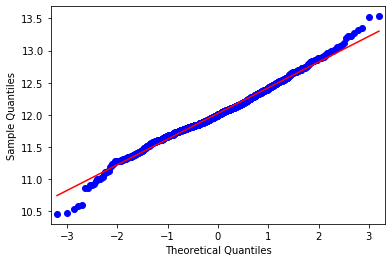

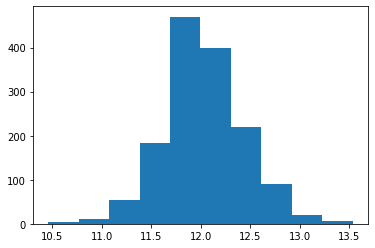

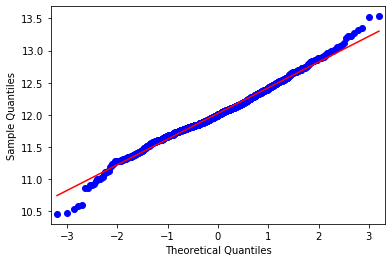

In [6]:
plt.hist(np.log(housing['SalePrice']))
sm.qqplot(np.log(housing['SalePrice']), line='s')

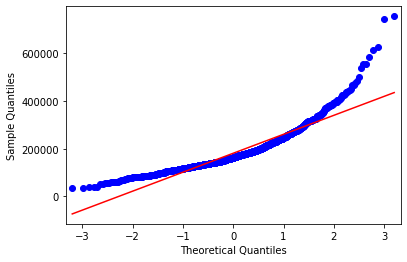

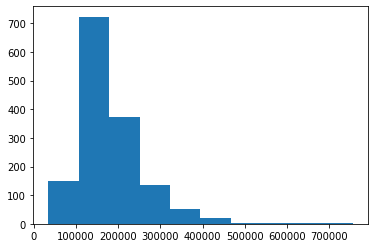

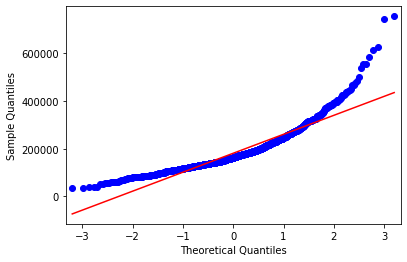

In [7]:
plt.hist(housing['SalePrice'])
sm.qqplot(housing['SalePrice'], line='s')

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

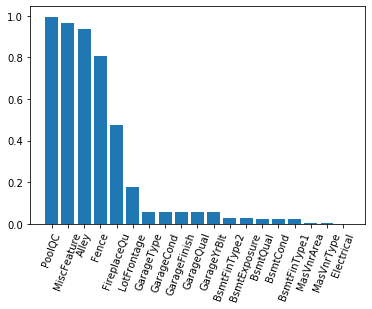

In [16]:
null_val_perc = housing.isnull().mean().sort_values(ascending=False)
null_val_perc = null_val_perc[null_val_perc > 0]
plt.xticks(rotation='70')
plt.bar(x=null_val_perc.index, height=null_val_perc)


In [196]:
null_val_perc.index.to_list()
# plt.plot(housing['MiscFeature'])
housing['Fence']

Id
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
        ...  
1456      NaN
1457    MnPrv
1458    GdPrv
1459      NaN
1460      NaN
Name: Fence, Length: 1460, dtype: object

In [22]:
zero_cols = housing.loc[:, (housing == 0).any()].columns.to_list()
zero_cols

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

(array([1.437e+03, 1.000e+00, 4.000e+00, 9.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  50.8, 101.6, 152.4, 203.2, 254. , 304.8, 355.6, 406.4,
        457.2, 508. ]),
 <a list of 10 Patch objects>)

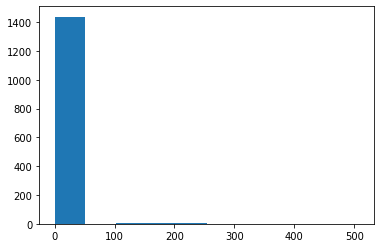

In [30]:
plt.hist(housing['3SsnPorch'])

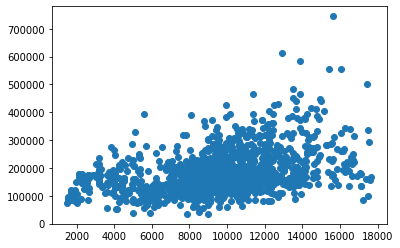

In [80]:
# plt.scatter(housing[['LotArea']], housing['SalePrice'])
lot_area_Q1 = housing['LotArea'].quantile(.25)
lot_area_Q3 = housing['LotArea'].quantile(.75)
lot_area_IQR = lot_area_Q3 - lot_area_Q1
lot_area_lower_bound = lot_area_Q1 - 1.5 * lot_area_IQR
lot_area_upper_bound = lot_area_Q3 + 1.5 * lot_area_IQR

lot_area_no_outlier = housing.loc[(housing['LotArea'] > lot_area_lower_bound) & (housing['LotArea'] < lot_area_upper_bound)]
plt.scatter(lot_area_no_outlier['LotArea'], lot_area_no_outlier['SalePrice'])